## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os
import sys

# if not os.path.exists('thinkdsp.py'):
#     !curl -O https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

sys.path.insert(0, os.path.abspath('../../third_party'))

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

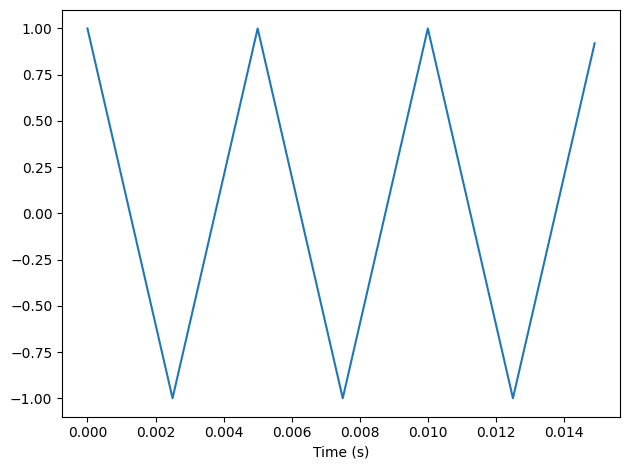

In [2]:
from thinkdsp import TriangleSignal
from thinkdsp import decorate

signal = TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [3]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

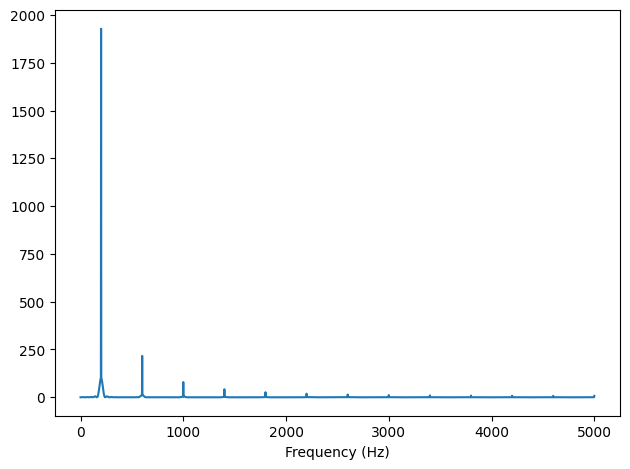

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Make a square signal and plot a 3 period segment.

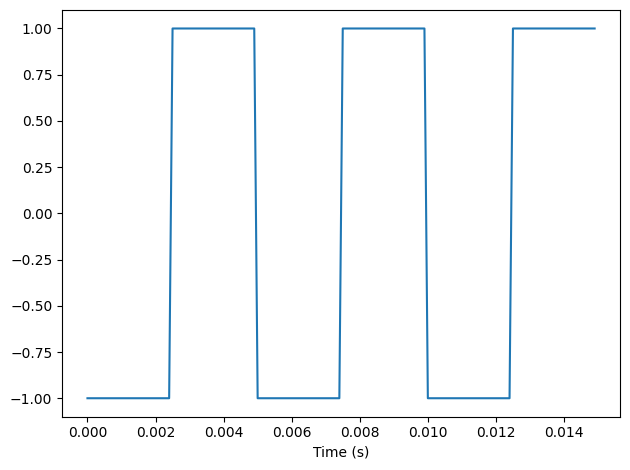

In [5]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [6]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

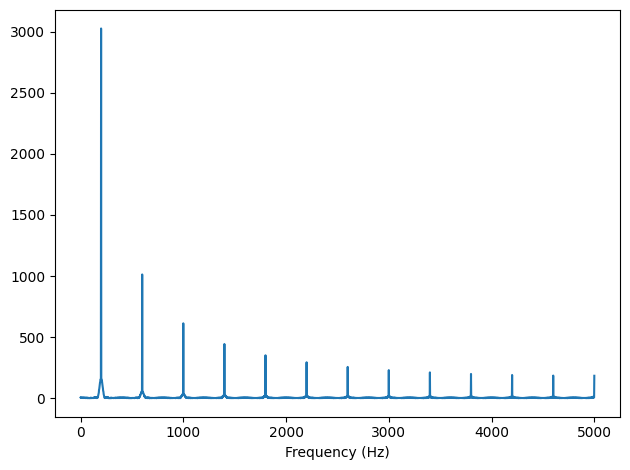

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

Create a sawtooth signal and plot a 3 period segment.

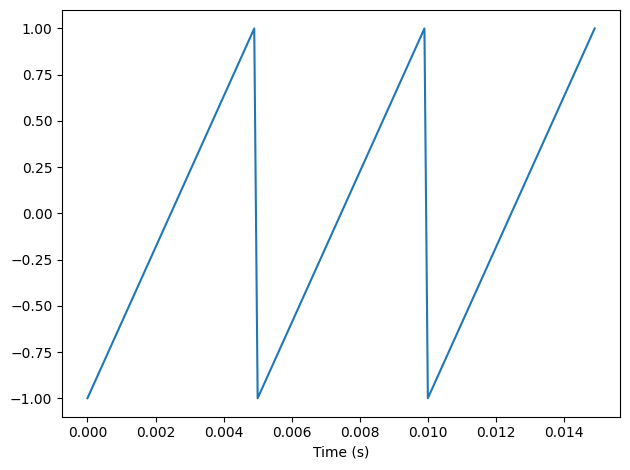

In [8]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a wave and play it.

In [9]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

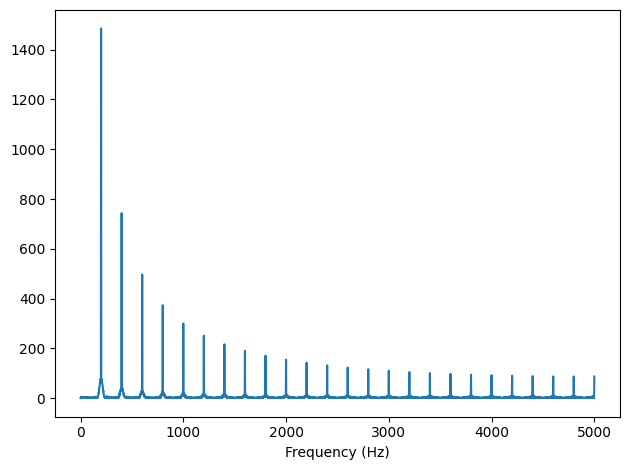

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

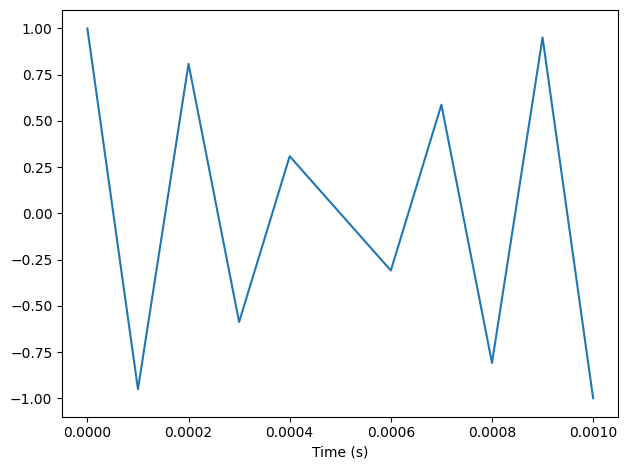

In [11]:
from thinkdsp import CosSignal

signal = CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

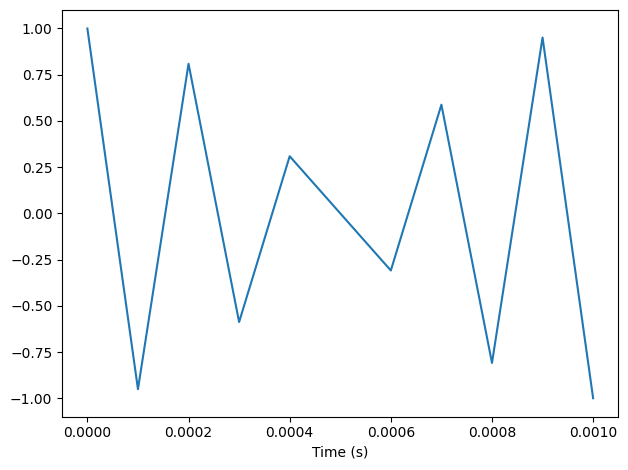

In [12]:
signal = CosSignal(5500)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

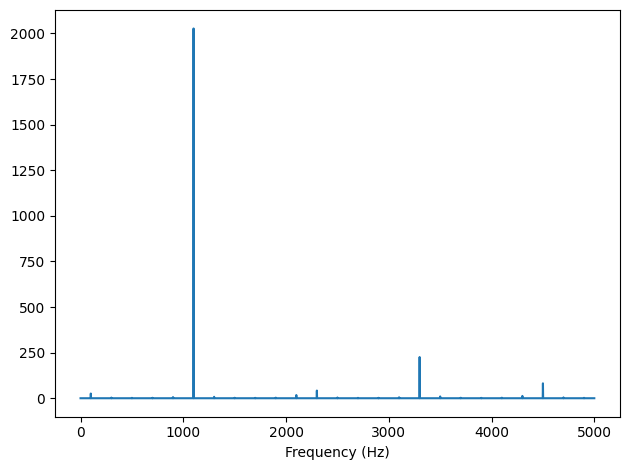

In [13]:
signal = TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Amplitude and phase

Make a sawtooth wave.

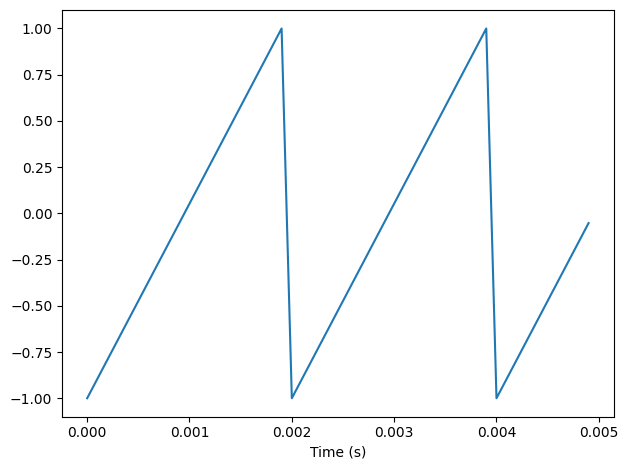

In [14]:
signal = SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [15]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [16]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j], shape=(5001,))

Compute the frequencies that match up with the elements of the FFT.

In [17]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03], shape=(5001,))

Plot the magnitudes vs the frequencies.

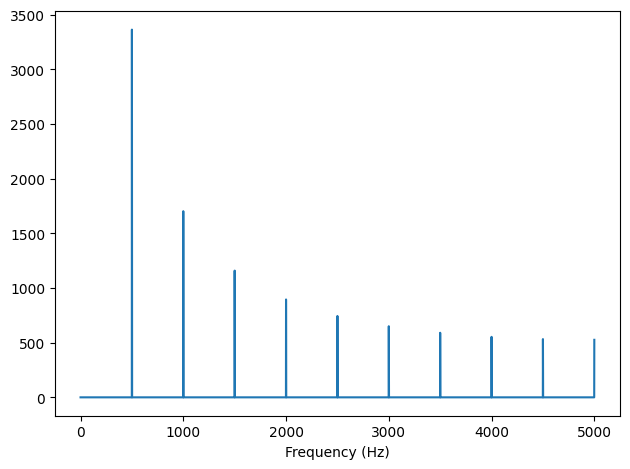

In [18]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)')

Plot the phases vs the frequencies.

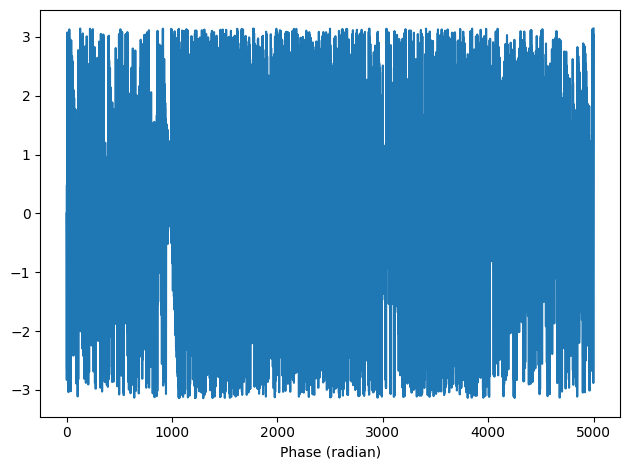

In [19]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

## What does phase sound like?

Shuffle the phases.

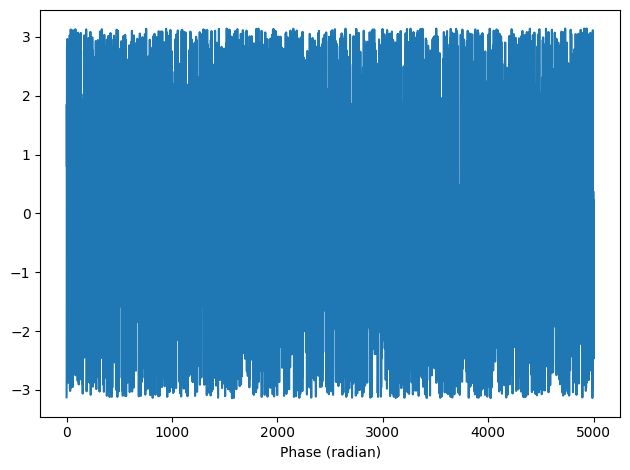

In [20]:
import random
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [21]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

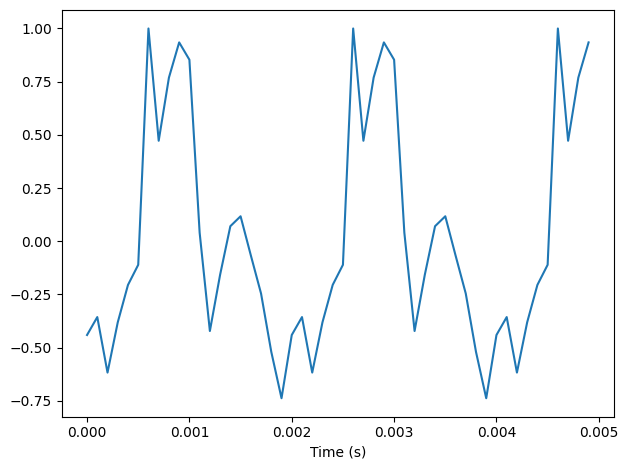

In [22]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
decorate(xlabel='Time (s)')

Play the wave with the shuffled phases.

In [23]:
wave2.make_audio()

For comparison, here's the original wave again.

In [24]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [25]:
def view_harmonics(freq, framerate):
    """Plot the spectrum of a sawtooth signal.

    freq: frequency in Hz
    framerate: in frames/second
    """
    signal = SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='C0')
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')
    display(wave.make_audio())

In [26]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

# Exercises

## Exercise 2

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave
Write a class called `SawtoothSignal` that extends `Signal` and provides evaluate to evaluate a sawtooth signal.

In [65]:
from thinkdsp import normalize, unbias, Sinusoid, PI2
import numpy as np


class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):  # ts is sequence of sample times to evaluate the signal at
        cycles = (self.freq * ts) + (self.offset / PI2)  # number of cycles since start
        frac, _int = np.modf(cycles)  # split cycles into fraction and integer parts
        ys = normalize(unbias(frac), self.amp)  # unbias() shifts waveform so it's centered at 0, normalize() scales it to the given amplitude
        return ys

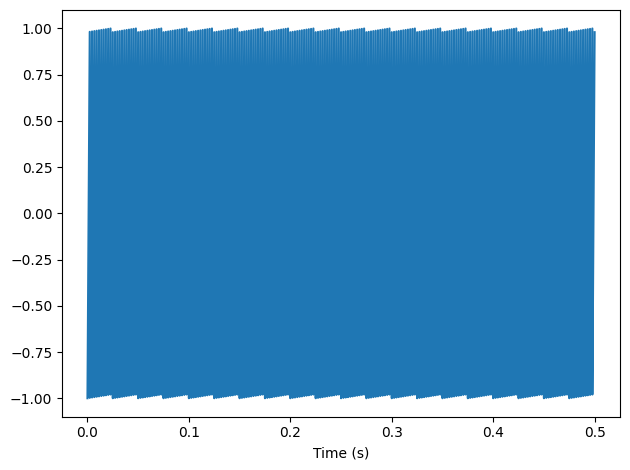

In [66]:
sawtooth = SawtoothSignal()
sawtooth_wave = sawtooth.make_wave(duration=0.5, framerate=40000)
sawtooth_wave.plot()
decorate(xlabel='Time (s)')

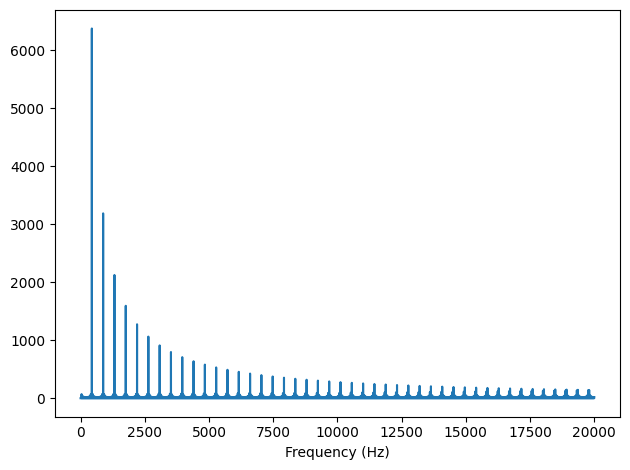

In [68]:
spectrum = sawtooth_wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

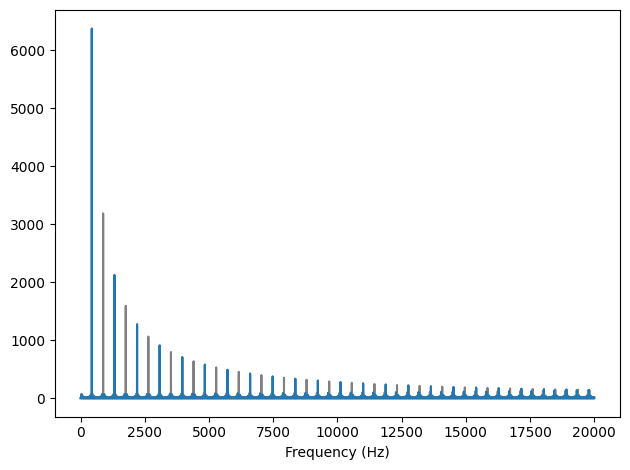

In [71]:
from thinkdsp import SquareSignal

sawtooth_wave.make_spectrum().plot(color='gray')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

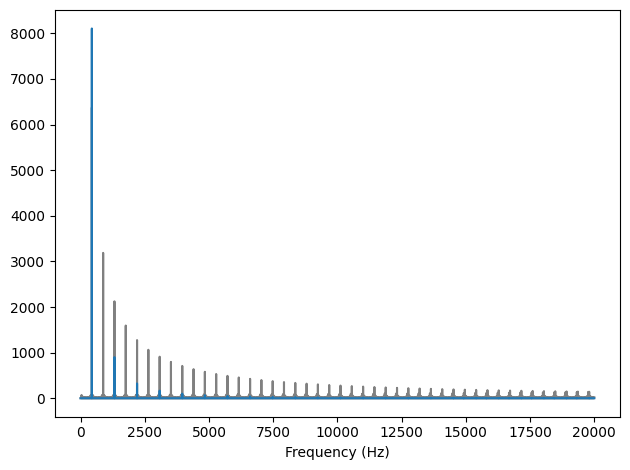

In [74]:
from thinkdsp import TriangleSignal

sawtooth_wave.make_spectrum().plot(color='gray')
triangle = TriangleSignal().make_wave(duration=0.5, framerate=40000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

## Exercise 3

Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

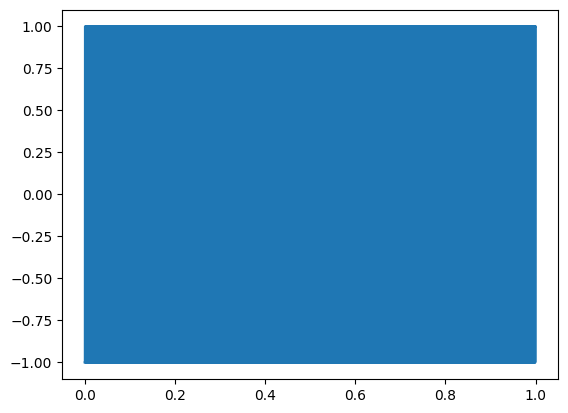

In [77]:
from thinkdsp import SquareSignal

square = SquareSignal(1100)
wave = square.make_wave(framerate=10000)
wave.plot()
wave.make_audio()

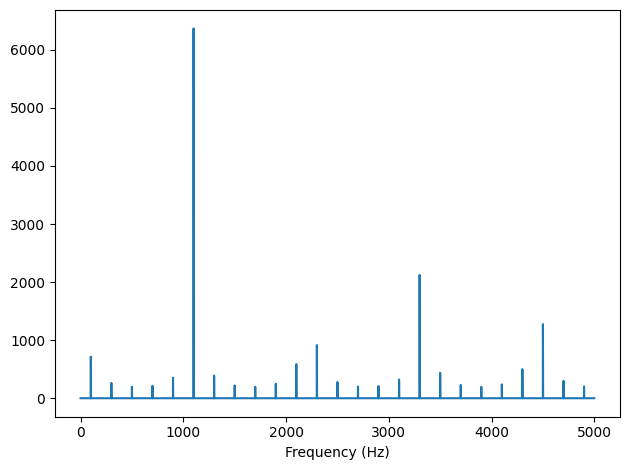

In [79]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

## Exercise 4

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that they start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1. Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2. Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3. Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

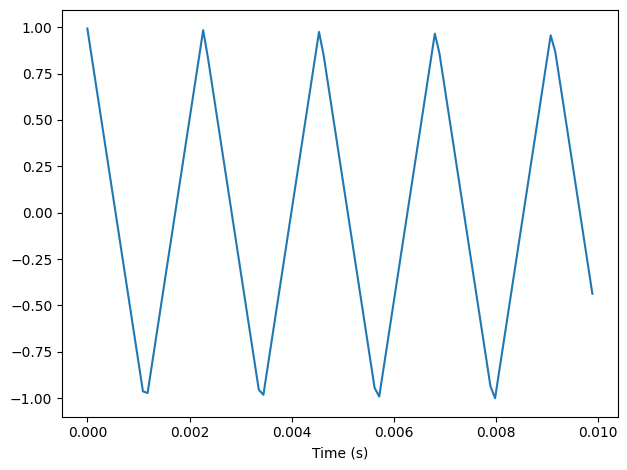

In [80]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal(440)
wave = triangle.make_wave(duration=0.01)
wave.plot()
decorate(xlabel='Time (s)')

In [81]:
spectrum = wave.make_spectrum()
print(spectrum.hs[0])

(1.0436096431476471e-14+0j)


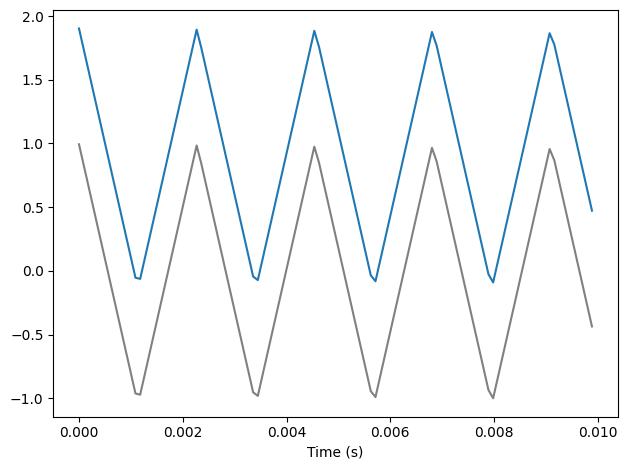

In [84]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()
wave.plot(color='gray')
decorate(xlabel='Time (s)')

## Exercise 5

Write a function that takes a `Spectrum` as a parameter and modifies it by dividing each element of `hs` by the corresponding frequency from `fs`. Hint: since division by zero is undefined, you might want to set `spectrum.hs[0] = 0`.
Test your function using a square, triangle, or sawtooth wave.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [89]:
from thinkdsp import Spectrum

def spectrum_div(spectrum: Spectrum) -> None:
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [86]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal()
triangle_wave = triangle.make_wave()
triangle_spectrum = triangle_wave.make_spectrum()
triangle_wave.make_audio()

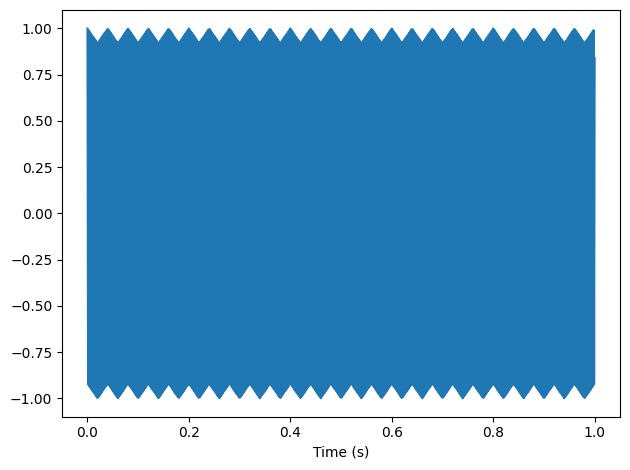

In [87]:
triangle_wave.plot()
decorate(xlabel='Time (s)')

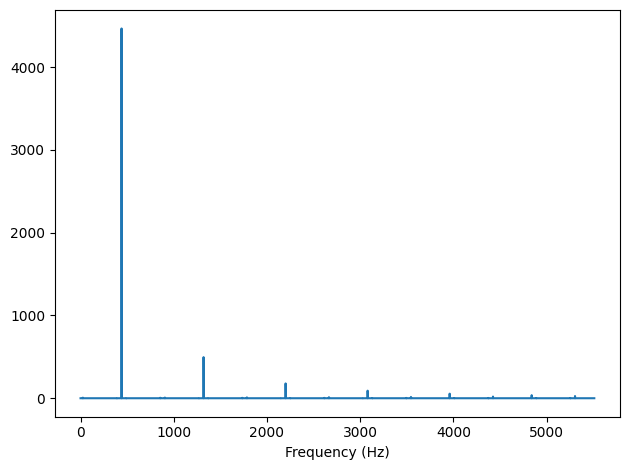

In [88]:
triangle_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

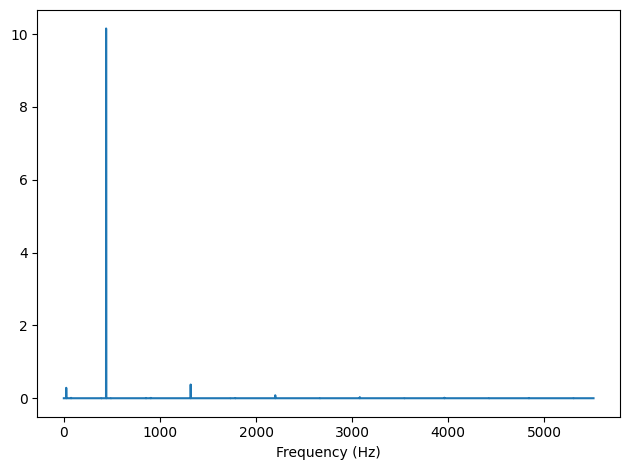

In [90]:
spectrum_div(triangle_spectrum)
triangle_spectrum.plot()
decorate(xlabel='Frequency (Hz)')

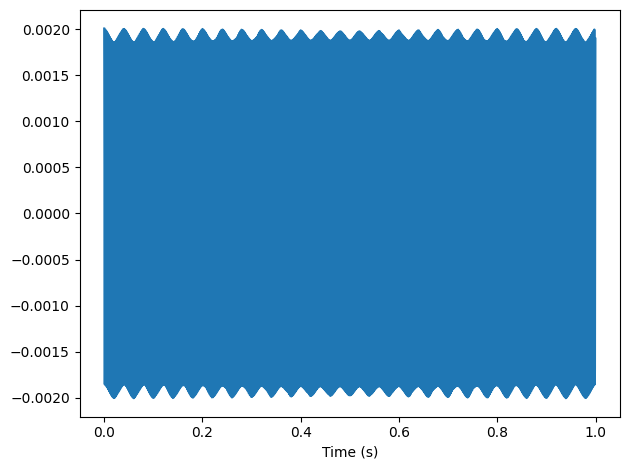

In [91]:
modified_triangle_wave = triangle_spectrum.make_wave()
modified_triangle_wave.plot()
decorate(xlabel='Time (s)')
modified_triangle_wave.make_audio()

## Exercise 6

Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f^2. Can you find a waveform that has even and odd harmonics that drop off like 1/f2?

Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

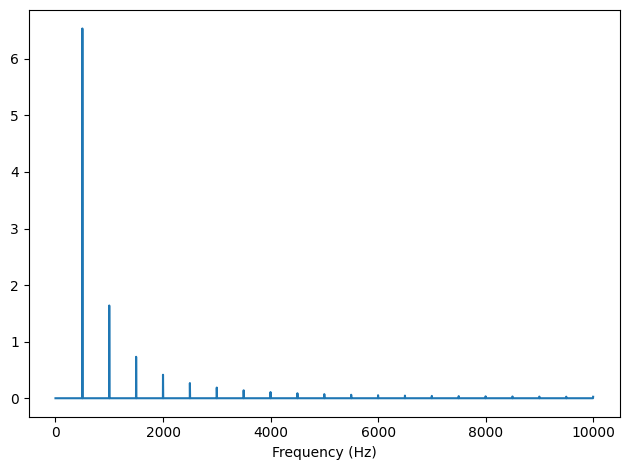

In [100]:
from thinkdsp import SawtoothSignal

sawtooth = SawtoothSignal(500)  # starts with even and odd harmonics
wave = sawtooth.make_wave(duration=0.5, framerate=20000)
spectrum = wave.make_spectrum()

spectrum.hs[1:] /= spectrum.fs[1:]  # divide by frequencies to get 1/f^2
spectrum.hs[0] = 0  # can't divide by 0, so set to 0

spectrum.plot()
decorate(xlabel='Frequency (Hz)')